# Pymaceuticals Inc.
---

### Analysis

- Key takeaways
    - Mouse weight does correlate to average tumor size(i.e. larger mouse = larger tumor)
    - Disregarding outliers Ramicane had the lowest average final tumor volume and Infubinol had       the highest.
    
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data= pd.merge(mouse_metadata, study_results, how="right")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [4]:
# Checking the number of mice.
micenum=len(combined_data['Mouse ID'].value_counts())
micenum

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
micedupe=combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint",]),'Mouse ID'].unique()
micedupe

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
micedupedf=combined_data.loc[combined_data['Mouse ID'] == "g989",:]
micedupedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cdf=combined_data[combined_data['Mouse ID'].isin(micedupe)==False]
cdf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [15]:
# Checking the number of mice in the clean DataFrame.
cleanMiceNum=len(cdf["Mouse ID"].value_counts())
cleanMiceNum

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regmean = cdf.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
regmedian = cdf.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
regvar = cdf.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
regstd = cdf.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
regsem = cdf.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

sumstats=pd.DataFrame({"Mean Tumor Vol": regmean,
                      "Median Tumor Vol": regmedian,
                      "Tumor Vol Var": regvar,
                      "Tumor Vol Std. Deviation": regstd,
                      "Tumor Vol Std. Error": regsem})
sumstats

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Var,Tumor Vol Std. Deviation,Tumor Vol Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sumstatsaggregate=cdf.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
sumstatsaggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

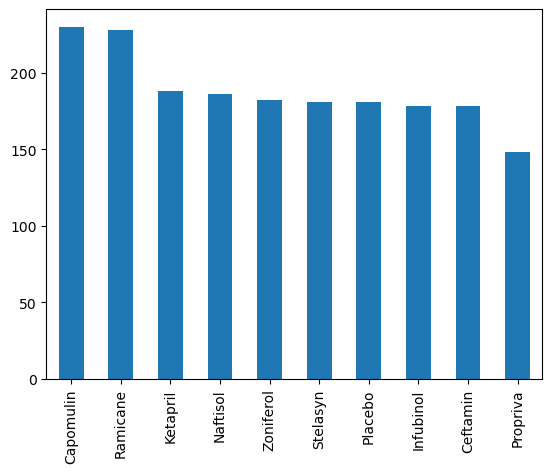

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
permice = cdf["Drug Regimen"].value_counts()

perMPlot= permice.plot.bar(color='tab:blue')

plt.show()

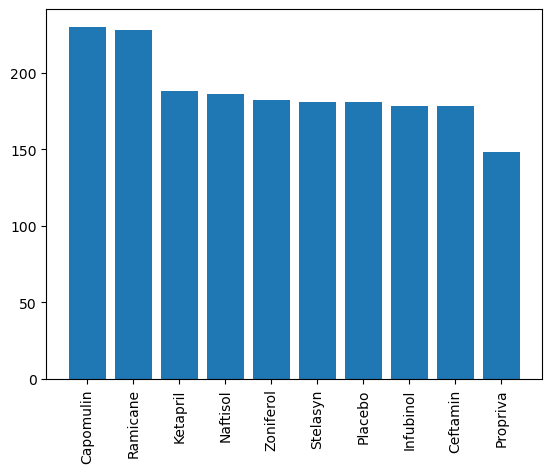

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = permice.index.values
y = permice.values

plt.bar(x,y,color='tab:blue')
# Labels overlapped so I modified the below code snippet from stack overflow here: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
plt.xticks(rotation=90)

plt.show()


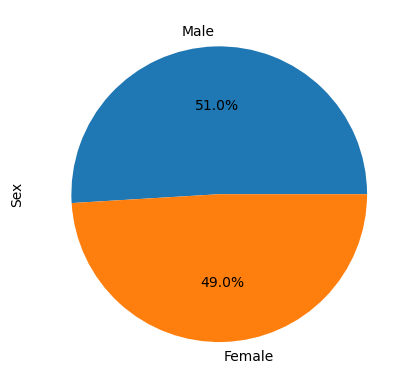

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexdata=cdf["Sex"].value_counts()
sexdata.plot.pie(autopct="%1.1f%%")
plt.show()

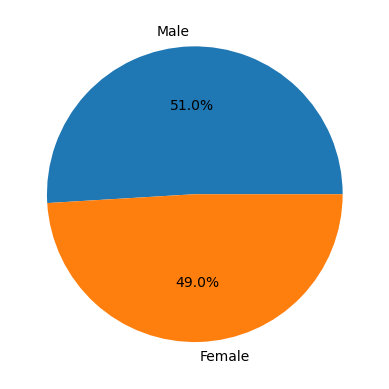

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male','Female']
plt.pie(sexdata,labels=labels,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousemax=cdf.groupby(['Mouse ID'])['Timepoint'].max()
mousemaxdf=pd.DataFrame(mousemax)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged=pd.merge(cdf,mousemaxdf, on=('Mouse ID','Timepoint'),how='right')

In [47]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolList=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tVolMaD= merged.loc[merged['Drug Regimen'] ==treatment,'Tumor Volume (mm3)']
    
    # add subset 
    tumorVolList.append(tVolMaD)
    
    # Determine outliers using upper and lower bounds
    quartiles = tVolMaD.quantile([.25,.5,.75])
    FirstQ = quartiles[.25]
    LastQ = quartiles[.75]
    IQR = LastQ - FirstQ
    lowbound = FirstQ - (1.5*IQR)
    upperbound = LastQ + (1.5*IQR)
    outliers = tVolMaD.loc[(tVolMaD < lowbound) | (tVolMaD > upperbound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


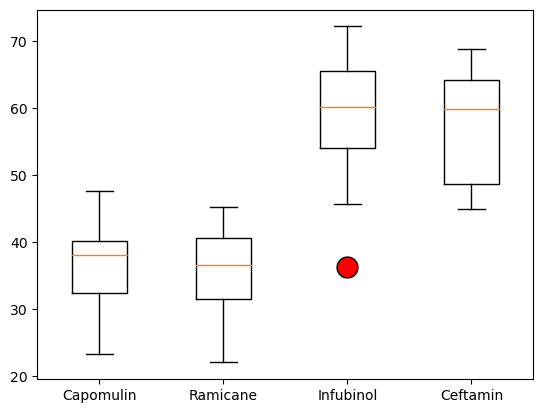

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outliercustom = dict(markerfacecolor="red",markersize=15)
plt.boxplot(tumorVolList, labels=treatments,flierprops=outliercustom)

plt.show()

## Line and Scatter Plots

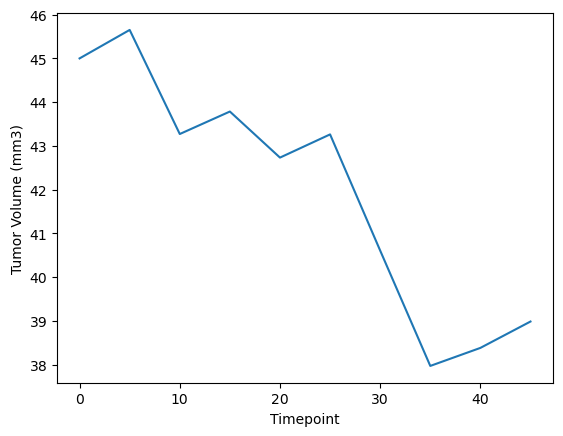

In [71]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin",:]
# Select a mouse that was treated with Capomulin
mcapo = Capomulin.loc[Capomulin['Mouse ID']== "b128",:]
# Generate a line plot of tumor volume versus time point for that mouse.
x = mcapo['Timepoint']
y = mcapo['Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

plt.show()

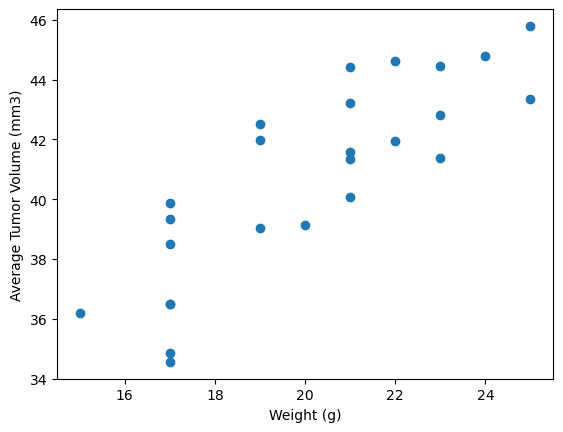

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgtumorvol=Capomulin.groupby('Mouse ID').mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(avgtumorvol['Weight (g)'],avgtumorvol['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.841936342469472


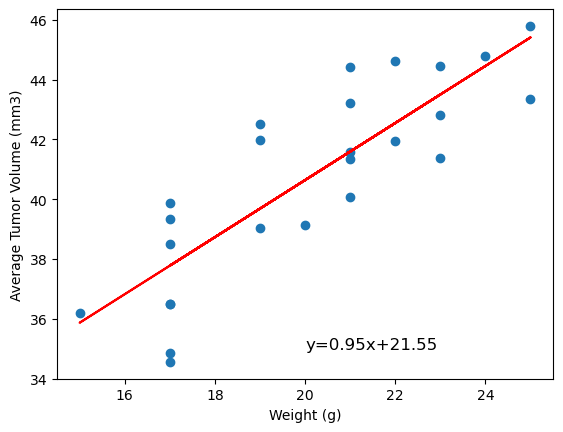

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

CC= st.pearsonr(avgtumorvol['Weight (g)'],avgtumorvol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {CC[0]}")

slope, intercept, rvalue, pvalue, stderr = st.linregress(avgtumorvol['Weight (g)'],avgtumorvol['Tumor Volume (mm3)'])
line_eq = "y="+str(round(slope,2))+"x+"+str(round(intercept,2))
plt.scatter(avgtumorvol['Weight (g)'],avgtumorvol['Tumor Volume (mm3)'])
plt.plot(avgtumorvol['Weight (g)'],slope*avgtumorvol['Weight (g)']+intercept,color='red')
plt.annotate(line_eq,(20,35),fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()